In [4]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import csv
from imblearn.combine import SMOTETomek

<AxesSubplot:>

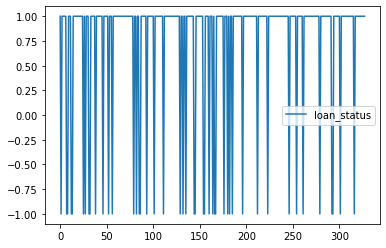

In [11]:
train_dataset = pd.read_csv("features/v1/learn.csv")
train_features = train_dataset.drop("loan_status", axis=1)
train_labels = train_dataset.loan_status
train_dataset.plot(y="loan_status", kind="scatter")

In [6]:
smt = SMOTETomek(random_state=19, sampling_strategy="auto")
feaures_res, labels_res = smt.fit_resample(train_features, train_labels)

In [7]:
rf = RandomForestClassifier(n_estimators= 30, random_state = 19)
rf.fit(feaures_res, labels_res)

RandomForestClassifier(n_estimators=30, random_state=19)

In [8]:
target_dataset = pd.read_csv("features/v1/test.csv")
target_features = target_dataset.drop("loan_status", axis=1).drop("loan_id", axis=1)
target_ids = target_dataset.loan_id

In [9]:
probabilities = rf.predict_proba(target_features)
positive_probabilities = [row[1] for row in probabilities]

In [10]:
with open("predictions/v1/random_forest_resampled.csv", "w") as outfile:
    writer = csv.writer(outfile)
    writer.writerow(["Id", "Predicted"])
    writer.writerows(zip(target_ids, positive_probabilities))
